In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpmath import *
from mpmath import mp, timing
from flint import arb_mat , ctx 


In [76]:
def log_of_norm(v,E):
    N = len(v)
    A = np.zeros((N,2,2),dtype = float)
    Nt = np.zeros((N,2,2),dtype = float)
    for i in range(N):
        A[i][0][0] = E - v[i]
        A[i][0][1] = -1
        A[i][1][0] = 1
        A[i][1][1] = 0
    Nt[0] = [[1,0],[0,1]]
    for i in range(N-1):
        Nt[i+1] = np.dot(A[i],Nt[i])
    return np.log(np.linalg.norm(Nt[N-1]))

def avg_of_log_of_norm(E,M,N):
    rx = np.zeros(M,dtype = float)
    for i in range(M):
        v1 = np.random.random(N)
        w = np.zeros(N)
        for j in range(N):
            if v1[j] <= 0.5:
                w[j] = v1[j]-1.5
            else:
                w[j] = v1[j]+0.5
        rx[i] = log_of_norm(w,E)
    return np.mean(rx)

def Periodic_Hamiltonian(v):
    N = len(v)
    M = mp.matrix(N)
    for i in range(N):
        M[i,i] = v[i]
    for i in range(N-1):
        M[i,i+1] = 1
        M[i+1,i] = 1
        
    M[0,N-1] = 1
    M[N-1,0] = 1
    return arb_mat(M)

def Antiperiodic_Hamiltonian(v):
    N = len(v)
    M = mp.matrix(N)
    for i in range(N):
        M[i,i] = v[i]
    for i in range(N-1):
        M[i,i+1] = 1
        M[i+1,i] = 1
        
    M[0,N-1] = -1
    M[N-1,0] = -1
    return arb_mat(M)

In [82]:
Nrealisations = 200;
Nperiod = 300;

energies = np.linspace(-4, 4,150)
Lyapunovexponent = np.zeros(len(energies))

for i in range(len(Lyapunovexponent)):
    Lyapunovexponent[i] = (1/Nperiod)*avg_of_log_of_norm(energies[i],Nrealisations,Nperiod)

In [80]:
mp.prec = 400
ctx.prec = 400

N = 300

v1 = np.random.random(N)
w = np.zeros(N)
for j in range(N):
    if v1[j] <= 0.5:
        w[j] = v1[j]-1.5
    else:
        w[j] = v1[j]+0.5

periodic_eigenvalues = Periodic_Hamiltonian(w).eig(algorithm="approx")
antiperiodic_eigenvalues = Antiperiodic_Hamiltonian(w).eig(algorithm="approx")

for i in range(N):
    for j in range(0, N-i-1):
        if periodic_eigenvalues[j].real > periodic_eigenvalues[j+1].real:
            periodic_eigenvalues[j], periodic_eigenvalues[j+1] = periodic_eigenvalues[j+1], periodic_eigenvalues[j]

for i in range(N):
    for j in range(0, N-i-1):
        if antiperiodic_eigenvalues[j].real > antiperiodic_eigenvalues[j+1].real:
            antiperiodic_eigenvalues[j], antiperiodic_eigenvalues[j+1] = antiperiodic_eigenvalues[j+1], antiperiodic_eigenvalues[j]

bandwidths = np.zeros(N)
bandcentres = np.zeros(N)

for i in range(N):
    bandwidths[i] = -(1/N)*log(abs(mp.mpc(periodic_eigenvalues[i]).real - mp.mpc(antiperiodic_eigenvalues[i]).real))
    bandcentres[i] = (1/2)*(mp.mpc(periodic_eigenvalues[i]).real + mp.mpc(antiperiodic_eigenvalues[i]).real)


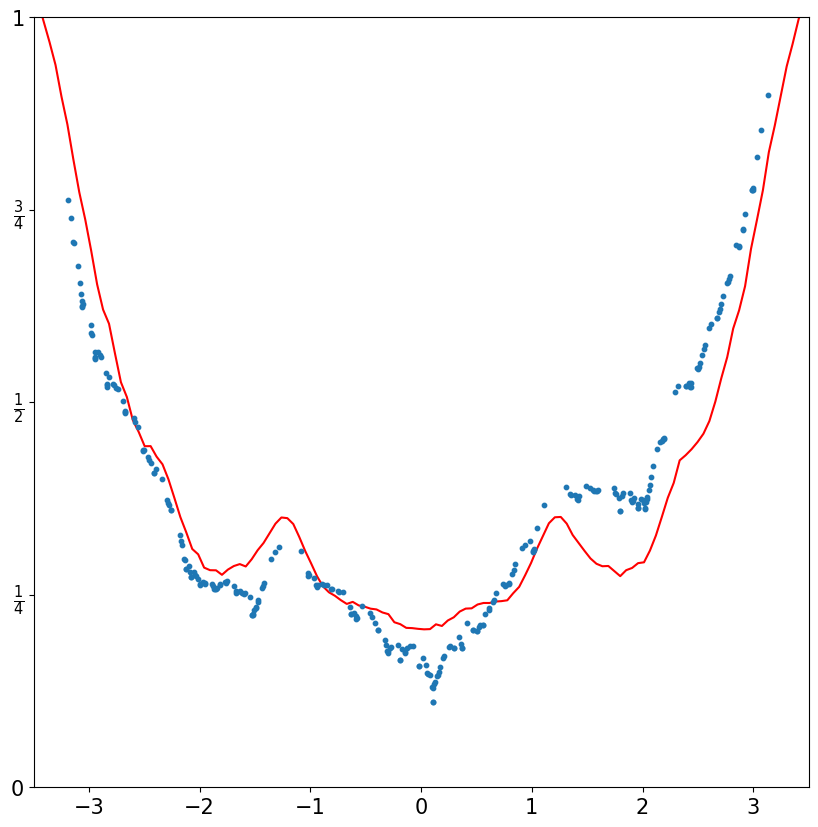

In [83]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 15})
ax.scatter(bandcentres,bandwidths,10,zorder = 2)
ax.plot(energies,Lyapunovexponent,'r-',linewidth = 1.5,zorder = 1)
ax.set(xlim=(-3.5, 3.5),ylim=(0, 1))
plt.yticks([0,1/4,1/2,3/4,1], [r'$0$',r'$\frac{1}{4}$',r'$\frac{1}{2}$',r'$\frac{3}{4}$',r'$1$'])
plt.savefig('IID_bandwidths.eps')